# PROJECT-6 "Задача сегментации".

### Варламов Александр (поток DSPR-131)

# 1. Problem(Проблема)

### Проблема:

В данном проекте мы решаем настоящую бизнес-задачу в области маркетинга. Предстоит произвести сегментацию клиентов на основе их покупательской способности, частоты совершения заказов и срока давности последнего заказа, а также определить оптимальную стратегию взаимодействия с ними.
<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

**Маркетинг** — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты **веб-аналитики**, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д.

### Задачи проекта:


**Бизнес-задача:** - произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача (как для специалиста в Data Science):** - построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.


### Цели проекта:

1. Произвести предобработку набора данных;
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать категории товаров и клиентов. 
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.



## 2. Collection(Сбор данных)

### Импорт необходимых библиотек и функций

In [150]:
import numpy as np # библиотека для научных вычислений в python / the fundamental package for scientific computing with python
import pandas as pd # работа с данными / python data analysis library

import datetime as dt # модуль для работы с датой и временем в python / module supplies classes for manipulating dates and times

import matplotlib.pyplot as plt # комплексная библиотека для создания статической, анимированной и интерактивной визуализации на python / comprehensive library for creating static, animated, and interactive visualizations in python
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns # библиотека визуализации данных python, основанная на matplotlib / python data visualization library based on matplotlib

import plotly.express as px # python библиотека для фомирования интерактивных, высококачественных графиков и визуализации данных / python graphing library makes interactive, publication-quality graphs
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from mpl_toolkits.mplot3d import Axes3D

# библиотека sklearn - python библиотека для машинного обучения построеная на библиотеке scipy / python module for machine learning built on top of scipy
from sklearn.ensemble import RandomForestClassifier # алгоритм случайный лес для задач класификации
from sklearn.ensemble import GradientBoostingClassifier # алгоритм градиентного бустинга для задач класификации

from sklearn.metrics import accuracy_score # метрика точность
from sklearn.metrics import classification_report # сводный отчет по метрикам класификации
from sklearn.metrics import silhouette_score # метрика коэффициент силуэта

from sklearn.cluster import KMeans # алгоритм кластеризации данных
from sklearn.cluster import AgglomerativeClustering # алгоритм кластеризации данных
from sklearn.mixture import GaussianMixture # алгорит кластеризации данных

from sklearn.preprocessing import MinMaxScaler # алгоритм стандартизации данных
from sklearn.preprocessing import StandardScaler # алгоритм стандартизации данных

from sklearn.pipeline import Pipeline # алгоритм 

from sklearn.model_selection import GridSearchCV # алгоритм для подбора гипер-праметров в моделях машинного обучения
from sklearn.model_selection import train_test_split # модуль для разделения данных на тренировочную и тестовую (валидационную) выборки

from sklearn.decomposition import PCA # алгоритм линейного уменьшения размерности "Метод главных компонентов"
from sklearn.manifold import TSNE # алгоритм нелинейного снижения размерности


# библиотека scipy - библиотека для научных вычислений на python / fundamental algorithms for scientific computing in python
from scipy.stats import normaltest # тест на проверку выборки на отличие от нормального распределения
import xgboost as xgb # алгоритм экстремального градиентного бустинга из библиотеки xgboost

from IPython.display import display, HTML

import warnings 
warnings.filterwarnings("ignore")

In [119]:
# фиксируем RANDOM_SEED, для воспроизводимости кода.
RANDOM_SEED = 1369

In [120]:
# фиксируем версии установленных пакетов
!pip freeze > requrements.txt

### Загружаем данные

In [5]:
# загружаем данные
data = pd.read_csv(
    "data/customer_segmentation_project.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)


### Первичный анализ

In [6]:
# выводим информацию о табличной структуре данных (голова - хвост)
print('Data shape: {}'.format(data.shape))
display(data.head(3))
display(data.tail(1))


Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680,France


In [7]:
# выводим информацию о данных с использованием метода info()
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


None

In [8]:
# выводим статистическую информацию о признаках с помощью функции describe()
display(data.describe())
display(data.describe(include=object))

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
count,541909,541909,540455,541909,406829,541909
unique,25900,4070,4223,23260,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,17841,United Kingdom
freq,1114,2313,2369,1114,7983,495478


### <span style="color:blue">Краткие выводы и комментарии:</span>

1. Dataset содержит 541 909 наблюдений и имеет 8 признаков;
2. Данные представлены следующими типами: int64 - 1 признак; float64 - 1 признак, object - 6 признаков (1 из которых это дата совершения покупки, несколько признаков числового формата);
3. Пропуски данных согласно метода info() присутствуют в 2-х признаках: Description, Customer ID;
4. Признаки 'InvoiceDate' имеет тип данных 'object', но представляют собой данные о дате и времени покупки;
5. Так же необходимо обратить внимание на данные в признаках Quantity и UnitPrice где минимальные значения отрицательны (скорей всего это говорит о возврате товара);
6. Наименования признаков следующие:
      * InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
      * Stock Code — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
      * Description — название товара;
      * Quantity — количество каждого товара за транзакцию; 
      * InvoiceDate — дата и время выставления счёта/проведения транзакции;
      * UnitPrice — цена за единицу товара в фунтах стерлингов;
      * CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
      * Country — название страны, в которой проживает клиент.

#### Задание 2.1
Сколько признаков в данных кодируются числовыми типами (int/float)?

In [9]:
# выводим информацию согласно вопросов
featers_num = data.select_dtypes(['int', 'float']).columns.to_list()
print(f'В данных признаки числового типа (int/float): {featers_num}')
print(f'В данных количество признаков числового типа (int/float): {len(featers_num)}')

В данных признаки числового типа (int/float): ['Quantity', 'UnitPrice']
В данных количество признаков числового типа (int/float): 2


#### Задание 2.2
Выведите признаки, в которых есть хотя бы один пропуск: 

In [10]:
# выводим информацию согласно вопросов
data.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Задание 2.3

Преобразуйте столбец InvoiceDate в формат datetime и укажите за какой период представлены данные.

In [11]:
# выводим информацию согласно вопросов
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')
date_start = data['InvoiceDate'].min()
date_finish = data['InvoiceDate'].max()
print(f'Данные представлены в период с {date_start} по {date_finish}.')

Данные представлены в период с 2010-12-01 08:26:00 по 2011-12-09 12:50:00.


#### Задание 2.4

1) Каково максимальное количество товаров в заказе (Quantity)? Ответ приведите в виде целого числа.
2) Каково минимальное количество товаров в заказе (Quantity)? Ответ приведите в виде целого числа.
3) Сколько, согласно данным, стоит самый дешёвый товар (за исключением товаров с отрицательной стоимостью)?

In [12]:
# выводим информацию согласно вопросов
print(f'Максимальное количество приобретенного товара составило {data.Quantity.max()}.')
print(f'Минимальное количество приобретенного товара составило {data.Quantity.min()}.')
mask_price = data['UnitPrice'] >= 0
min_price = data[mask_price]['UnitPrice'].min()
print(f'Стоимость самого дешевого товара составила {min_price} фунтов.стерлингов.')

Максимальное количество приобретенного товара составило 80995.
Минимальное количество приобретенного товара составило -80995.
Стоимость самого дешевого товара составила 0.0 фунтов.стерлингов.


#### Задание 2.5

1) Сколько уникальных клиентов покупали товары за период выгрузки датасета?
2) Сколько уникальных стран содержится в столбце Country (исключая специальный код 'Unspecified', обозначающий неопределенную страну)?
3) Укажите идентификатор самого популярного товара (StockCode):

In [13]:
# выводим информацию согласно вопросов
print(f'Количество клиентов в данных приобретающих товар = {data.CustomerID.nunique()}')
print(f'Количество стран в данных  = {data.Country.nunique() - 1}')
print()
print(f'Идентификатор самого популярного товара {data.StockCode.value_counts().nlargest(1)}')

Количество клиентов в данных приобретающих товар = 4372
Количество стран в данных  = 37

Идентификатор самого популярного товара StockCode
85123A    2313
Name: count, dtype: int64


## 3. Cleaning(Очистка данных)

### Обработка пропусков

#### Задание 3.1
1) Сколько всего в таблице пропущенных значений?
2) Пропуски в столбце с идентификатором клиента и описанием товара свидетельствуют о некорректных/незавершённых транзакциях.

Удалите строки, содержащие пропуски в этих столбцах. Сколько строк осталось в таблице?



In [14]:
# выводим информацию согласно вопросов
print(f'Общее количество пропусков в данных = {data.isnull().sum().sum()}.')
data = data.dropna()
print(f'Количество наблюдений после удаления пропусков составило = {data.shape[0]}.')

Общее количество пропусков в данных = 136534.
Количество наблюдений после удаления пропусков составило = 406829.


### Обработка дубликатов

#### Задание 3.2
Следом за пропусками проверим наличие дубликатов.

1. Сколько в таблице полностью дублирующихся записей?
2. Удалите дубликаты из таблицы. Сколько строк осталось?



In [15]:
# выводим информацию согласно вопросов
data_dublicate = data[data.duplicated()]
print(f'Количество дубликатов в данных составляет = {data_dublicate.shape[0]}.')
data = data.drop_duplicates().reset_index(drop=True)
print(f'Количество наблюдений после удаления дубликатов составило = {data.shape[0]}.')

Количество дубликатов в данных составляет = 5225.
Количество наблюдений после удаления дубликатов составило = 401604.


### Обработка выбросов (аномалий).

<span style="color:red">NB!!! По результатам первичного анализа мы отметили, что в признаке с количеством товара есть отрицательные значения. Посмотрим и оценим их.</span>

In [16]:
# выведем первые строки таблицы, в которой столбец Quantity меньше 0.
negative_quantity = data[(data['Quantity']<0)]
print(f'Количество наблюдений с отрицательным значением "Quantity" составляет: {negative_quantity.shape[0]}')
display(negative_quantity.head(5))

Количество наблюдений с отрицательным значением "Quantity" составляет: 8872


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


<span style="color:red">NB!!! Отрицательные значения в признаке Quantity означают возврат товара и значения в признаке InvoiceNo имеют литеру "С".
Проверим, что все записи из таблицы с отрицательным количеством товара действительно являются возвратными транзакциями. Если транзакция не является возвратом, но содержит отрицательное количество товара, это будет поводом считать её выбросом.</span>

#### Задание 3.3

Сколько транзакций из таблицы negative_quantity не содержат в номере заказа признак возврата?

In [17]:
# выводим информацию согласно вопросов
count = negative_quantity['InvoiceNo'].apply(lambda x: 0 if x[0] == 'C' else 1)
print(f'Количество транзакций не содержащих признак возврата = {count.sum()}.')

Количество транзакций не содержащих признак возврата = 0.


<span style="color: blue">**Комментарий:**</span> все транзакции возвратные.

<span style="color:red"> NB!!! Боллее подробно посмотрим на возвраты. В данных на каждый уникальный товар заведена отдельная строка и это мешает определить общее количество возвратов. 
Чтобы подсчитать число возвратов, сначала необходимо определить, сколько уникальных товаров указано в транзакции (корзине/basket) для каждой уникальной пары «клиент-заказ».</spain>

In [18]:
# сгруппируем данные по клиентам и заказам
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
display(nb_products_per_basket.head(5))

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


<span style="color:red">NB!!! Добавим во вспомогательную таблицу nb_products_per_basket признак отмены заказа (order_canceled): он равен 1, если транзакция является возвратом, и 0 — в противном случае.</span>

### Задание 3.4

Сколько процентов заказов в таблице являются возвратами? Ответ приведите в виде целого числа.


In [19]:
# выводим информацию согласно вопросов
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x: 1 if x[0] == 'C' else 0)
percentag_order_canceled = nb_products_per_basket['order_canceled'].sum() / nb_products_per_basket['order_canceled'].shape[0]*100
print(f'Количество возвратных заказов составляет {percentag_order_canceled.round(0)} %.')

Количество возвратных заказов составляет 16.0 %.


In [20]:
# выведем информацию об отмененных заказах:
nb_products_per_basket[nb_products_per_basket['order_canceled'] == 1].sample(7)

,CustomerID,InvoiceNo,Number of products,order_canceled
19853,17675,C549039,1,1
12842,15622,C555329,1,1
11411,15215,C572855,5,1
3258,13093,C545436,3,1
3260,13093,C546880,1,1
12464,15521,C552343,1,1
20417,17811,C552944,1,1


<span style="color:red">NB!!! Для анализа и оценки выведем информацию из таблицы со всеми транзакциями по 3 клиентам:</span>

In [21]:
# для клиента 17856
data[data['CustomerID'] == '17856']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
70484,545505,22957,SET 3 PAPER VINTAGE CHICK PAPER EGG,2,2011-03-03 11:40:00,2.95,17856,United Kingdom
70485,545505,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,288,2011-03-03 11:40:00,1.06,17856,United Kingdom
70486,545505,21320,GLASS CHALICE GREEN LARGE,24,2011-03-03 11:40:00,2.10,17856,United Kingdom
70487,545505,22800,ANTIQUE TALL SWIRLGLASS TRINKET POT,32,2011-03-03 11:40:00,3.39,17856,United Kingdom
70488,545505,21735,TWO DOOR CURIO CABINET,1,2011-03-03 11:40:00,12.75,17856,United Kingdom
83386,547045,21320,GLASS CHALICE GREEN LARGE,72,2011-03-20 11:37:00,2.10,17856,United Kingdom
83387,547045,22800,ANTIQUE TALL SWIRLGLASS TRINKET POT,128,2011-03-20 11:37:00,3.39,17856,United Kingdom
113417,C550770,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-9,2011-04-20 12:59:00,1.06,17856,United Kingdom
113418,C550771,21320,GLASS CHALICE GREEN LARGE,-7,2011-04-20 13:11:00,2.10,17856,United Kingdom
113419,550772,22800,ANTIQUE TALL SWIRLGLASS TRINKET POT,12,2011-04-20 13:13:00,3.75,17856,United Kingdom


In [22]:
# для клиента 12452
data[data['CustomerID'] == '12452']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
366919,578099,22554,PLASTERS IN TIN WOODLAND ANIMALS,12,2011-11-23 08:05:00,1.65,12452,Switzerland
366920,578099,85178,VICTORIAN SEWING KIT,12,2011-11-23 08:05:00,1.25,12452,Switzerland
366921,578099,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,2011-11-23 08:05:00,2.95,12452,Switzerland
366922,578099,22941,CHRISTMAS LIGHTS 10 REINDEER,2,2011-11-23 08:05:00,8.50,12452,Switzerland
366923,578099,22816,CARD MOTORBIKE SANTA,12,2011-11-23 08:05:00,0.42,12452,Switzerland
366924,578099,22144,CHRISTMAS CRAFT LITTLE FRIENDS,6,2011-11-23 08:05:00,2.10,12452,Switzerland
366925,578099,22555,PLASTERS IN TIN STRONGMAN,12,2011-11-23 08:05:00,1.65,12452,Switzerland
366926,578099,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-11-23 08:05:00,1.95,12452,Switzerland
366927,578099,22467,GUMBALL COAT RACK,6,2011-11-23 08:05:00,2.55,12452,Switzerland
366928,578099,22781,GUMBALL MAGAZINE RACK,6,2011-11-23 08:05:00,7.65,12452,Switzerland


In [23]:
# для клиента 12346
data[data['CustomerID'] == '12346']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
37511,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
37516,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom


<span style="color: blue">**Комментарий:**</span> 
1. Мы видим, что часть заказов возвращается частично (CustomerID: 17856, StockCode: 84947, 21320);
2. Присутсвуют неномерные кода товаров (CustomerID: 12452, StockCode: POST) и есть как продажи, так и возврат;
3. Есть коды товара с длбавлением буквенных обозначений (CustomerID: 17856, StockCode: 85199L). 

#### Задание 3.5
Выдвигаем гипотезу: для каждой отменённой транзакции в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара. Необходимо подтвердить или опровергнуть гипотезу.

In [24]:
# формируем код для подтверждения или опровержения гипотезы
count = 0
list_customer_id = set()
for index, col in negative_quantity.iterrows():
    if data[(data['CustomerID'] == col['CustomerID']) & (data['Quantity'] == -col['Quantity']) 
                & (data['StockCode'] == col['StockCode'])].shape[0] == 0:
        list_customer_id = list_customer_id.union(col[7:8])
        count += 1 
        #print(col)
        #print('Гипотеза не верна!')
        #break
if count == 0:
    print('Гипотеза верна - транзакции возврат / покупка совпадают на 100%!')
else:
    print('Гипотеза не верна - транзакции возврат / покупка не совпадают!')
    print(f'Количество строк не имеющих аналогов с тем же кодом, ID клиента и кода товара = {count}.')
print()
print('Список ID клиентов по которым транзакции возврат / покупка не совпадают:')
print(list_customer_id)                


Гипотеза не верна - транзакции возврат / покупка не совпадают!
Количество строк не имеющих аналогов с тем же кодом, ID клиента и кода товара = 5626.

Список ID клиентов по которым транзакции возврат / покупка не совпадают:
{'Czech Republic', 'Netherlands', 'Italy', 'Switzerland', 'EIRE', 'United Kingdom', 'Finland', 'Denmark', 'France', 'Cyprus', 'Germany', 'European Community', 'Poland', 'Israel', 'Greece', 'Australia', 'Channel Islands', 'Spain', 'Portugal', 'Sweden', 'Japan', 'Norway', 'Belgium', 'Saudi Arabia', 'Malta', 'Austria'}


<span style="color:red">NB!!! Для анализа и оценки выведем информацию по нескольким клиентам из сформированного списка (16444, 15728, 13266, 14527):</span>

In [25]:
# выводим информацию о транзакциях по клиенту с ID 16444
data[data['CustomerID'] == '16444']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
83492,C547054,M,Manual,-1,2011-03-20 12:11:00,6.95,16444,United Kingdom
83493,C547054,35400,WOODEN BOX ADVENT CALENDAR,-1,2011-03-20 12:11:00,8.95,16444,United Kingdom
83494,547055,22668,PINK BABY BUNTING,2,2011-03-20 12:14:00,2.95,16444,United Kingdom
83495,547055,22481,BLACK TEA TOWEL CLASSIC DESIGN,4,2011-03-20 12:14:00,1.25,16444,United Kingdom
83496,547055,22090,PAPER BUNTING RETROSPOT,1,2011-03-20 12:14:00,2.95,16444,United Kingdom
...,...,...,...,...,...,...,...,...
306838,572483,22197,POPCORN HOLDER,30,2011-10-24 13:50:00,0.85,16444,United Kingdom
306839,572483,20847,ZINC HEART LATTICE CHARGER LARGE,1,2011-10-24 13:50:00,3.75,16444,United Kingdom
306840,572483,20848,ZINC HEART LATTICE CHARGER SMALL,1,2011-10-24 13:50:00,2.95,16444,United Kingdom
306841,572483,85049E,SCANDINAVIAN REDS RIBBONS,2,2011-10-24 13:50:00,1.25,16444,United Kingdom


In [26]:
# выводим информацию о транзакциях по клиенту с ID 15728
data[data['CustomerID'] == '15728']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
303916,C572228,22835,HOT WATER BOTTLE I AM SO POORLY,-2,2011-10-21 14:03:00,4.65,15728,United Kingdom
303917,C572228,22113,GREY HEART HOT WATER BOTTLE,-5,2011-10-21 14:03:00,3.75,15728,United Kingdom
303918,C572228,22112,CHOCOLATE HOT WATER BOTTLE,-17,2011-10-21 14:03:00,4.25,15728,United Kingdom
303919,C572228,22111,SCOTTIE DOG HOT WATER BOTTLE,-10,2011-10-21 14:03:00,3.45,15728,United Kingdom


In [27]:
# выводим информацию о транзакциях по клиенту с ID 13266
data[data['CustomerID'] == '13266']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
21514,C539068,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,-36,2010-12-15 16:56:00,1.25,13266,United Kingdom
91113,547891,10125,MINI FUNKY DESIGN TAPES,20,2011-03-28 10:14:00,0.85,13266,United Kingdom
91114,547891,22754,SMALL RED BABUSHKA NOTEBOOK,12,2011-03-28 10:14:00,0.85,13266,United Kingdom
91115,547891,22755,SMALL PURPLE BABUSHKA NOTEBOOK,12,2011-03-28 10:14:00,0.85,13266,United Kingdom
91116,547891,21397,BLUE POLKADOT EGG CUP,48,2011-03-28 10:14:00,0.39,13266,United Kingdom
...,...,...,...,...,...,...,...,...
378620,579174,21485,RETROSPOT HEART HOT WATER BOTTLE,6,2011-11-28 14:39:00,4.95,13266,United Kingdom
378621,579174,84078A,SET/4 WHITE RETRO STORAGE CUBES,1,2011-11-28 14:39:00,39.95,13266,United Kingdom
378622,579174,23236,STORAGE TIN VINTAGE DOILY,6,2011-11-28 14:39:00,2.89,13266,United Kingdom
378623,579174,23112,PARISIENNE CURIO CABINET,2,2011-11-28 14:39:00,7.50,13266,United Kingdom


In [28]:
# выводим информацию о транзакциях по клиенту с ID 14527
data[data['CustomerID'] == '14527']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
6521,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom
6522,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom
6523,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom
6524,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom
...,...,...,...,...,...,...,...,...
396948,581114,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2011-12-07 12:19:00,4.95,14527,United Kingdom
396949,581114,22835,HOT WATER BOTTLE I AM SO POORLY,2,2011-12-07 12:19:00,4.95,14527,United Kingdom
396950,581114,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2011-12-07 12:19:00,4.25,14527,United Kingdom
396951,581114,21479,WHITE SKULL HOT WATER BOTTLE,2,2011-12-07 12:19:00,4.25,14527,United Kingdom


<span style="color: blue">**Комментарий:**</span> 
1. Мы видим, что есть товары со специальной литерой M и D (CustomerID: 16444, 14527, StockCode: M, D);
2. Присутсвует только возврат в конце периода данных (CustomerID: 15728, StockCode: 22835, 22113, 22112, 22111), при этом дата возврата в конце периода данных. Возможно данные по приходу были удалены при удалении наблюдений с пропусками;
3. Присутвует возврат в начале периода данных (CustomerID: 13266, StockCode: 84032B), возможно покупка была осуществлена ранее даты, предоставленных данных.

Данные факты необходимо учесть в будющеем при работе с данными.

#### Задание 3.6
Выдвигаем новую гипотезу: для каждой отменённой транзакции в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара, если на товар не распространяются скидки. Верна ли гипотеза?

In [29]:
# формируем код для подтверждения или опровержения гипотезы
data_check = negative_quantity[negative_quantity['StockCode'] != 'D']

for index, col in  data_check.iterrows():
    if data[(data['CustomerID'] == col['CustomerID']) & (data['Quantity'] == -col['Quantity']) 
                & (data['Description'] == col['Description'])].shape[0] == 0: 
        print(col)
        print()
        print('Гипотеза не верна!')
        break

InvoiceNo                              C536383
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
Quantity                                    -1
InvoiceDate                2010-12-01 09:49:00
UnitPrice                                 4.65
CustomerID                               15311
Country                         United Kingdom
Name: 154, dtype: object

Гипотеза не верна!


<span style="color:red">NB!!! Для анализа и оценки выведем информацию по транзакции, относящиеся к клиенту с идентификатором 15311 и товаром под кодом 35004C:</span>

In [30]:
# выведем информацию
data[(data['CustomerID'] == '15311') & (data['StockCode'] == '35004C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
6750,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
11855,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
18214,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
25143,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom
27303,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom
37034,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom
48630,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom


<span style="color:blue">**Комментарий:**</span> 

1. На первой строке мы видим заказ с отменой (номер заказа начинается с символа C). Однако возникает вопрос: на какой заказ пришла эта отмена, ведь более ранних записей о транзакциях, связанных с этим клиентом, нет. Проблема в том, что заказ на покупку данного товара от клиента поступил раньше декабря 2010 года, а этих данных в нашей таблице нет. Это очень популярная проблема, которая возникает практически при любой работе с транзакциями: есть только фрагмент из общих данных, однако неизвестно, что предшествовало этому фрагменту;

2. По двум следующим строкам видно, что клиент может отменить не весь заказ, а только его часть (5 декабря клиент покупает 12 единиц товара, а 8 декабря оформляет возврат только на одну единицу товара).

<span style="color:red"> NB!!! Итак, теперь мы знаем все особенности отмены заказов. При сегментировании клиентов мы будем определять их покупательскую способность, а для этого очень важно учитывать возвраты товаров. Поэтому давайте создадим в данных о транзакциях признак QuantityCanceled, который будет указывать на количество возвращённого впоследствии товара для каждой транзакции.</span> 

**Вводим ограничения, мы не будем учитывать сложные пограничные случаи:**
1. Отменённая транзакция не имеет противоположной (на транзакцию-возврат не нашлось ни одной транзакции на покупку);
2. Количество возвращённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом).

Опишем функцию ***get_quantity_canceled()**, которая принимает на вход таблицу с транзакциями и возвращает объект Series — столбец, в котором указано количество возвращённого впоследствии товара для каждой транзакции. На основе результата работы этой функции мы создаём в таблице с транзакциями новый столбец QuantityCanceled.

In [31]:
# формируем код функции
def get_quantity_canceled(data):
    """
    Функция, которая на основании первоначального dataset возвращает объект QuantityCanceled в котором указано количество возвращаемого впоследствии товара для каждой транзакции.
    
    Args:
        data (pd.Dataframe()): исходный Dataframe
        
    Returns:
        quantity_canceled (pd.Series()): количество возвращаемого товара для каждой транзакции.
    """
    # инициализируем Series той же длины, что и столбцы таблицы, нулями
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # создаем DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # транзация-возврат не имеет контрагента - ничего не делаем
        if (df_test.shape[0] == 0): 
            continue
        # транзакция-возврат имеет ровно одного контрагента
        # добавляем количество отмененного в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # транзакция-возврат имеет несколько контрагентов
        # задаем количество отмененного товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара > -(количество товаров в транзакции-возврате)
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

In [32]:
# инициируем функцию get_quantity_canceled()
quantity_canceled = get_quantity_canceled(data)

In [33]:
# создадим признак Quantity_canceled в данных
data['QuantityCanceled'] = quantity_canceled

#### Задание 3.7
Подсчитайте суммарное количество отмененных товаров в столбце QuantityCanceled. 


In [34]:
# выводим информацию согласно вопросов
print(f'Суммарное количество возвращенных товаров = {data.QuantityCanceled.sum()}')

Суммарное количество возвращенных товаров = 245266.0


#### Задание 3.8
Теперь, когда мы разобрались с транзакциями-возвратами, они больше нам не понадобятся. 
Удалите из таблицы транзакции, в поле которых указано отрицательное количество товара.  
Сколько записей осталось?

In [35]:
# выводим информацию согласно вопросов
data_without_canceled = data[data['Quantity'] >= 0]
print(f'После удаления наблюдений возврата, количество наблюдений составило {data_without_canceled.shape[0]}.')

После удаления наблюдений возврата, количество наблюдений составило 392732.


<span style="color:red">NB!!! Следующая проблема — это специальные виды транзакций. Ранее мы уже отмечали, что для товаров со скидкой признак StockCode обозначен как 'M' и 'D'. Необходимо выявить другие специальные коды, и так как специальные операции не характеризуют наших клиентов, и не несут полезной информации необходимо удалите все специальные транзакции из таблицы. 


#### Задание 3.9

1. Сколько уникальных специальных видов транзакций вам удалось найти?
2. Сколько записей осталось?



In [36]:
# с помощью регулярных выражений ищем записи со специальными кодами и создаем дополнительный признак
special_stockcode = data_without_canceled['StockCode'].str.contains('^[a-zA-Z]+', regex=True)
special_stockcode[special_stockcode == True]
data_without_canceled['SpecialStockcode'] = special_stockcode


In [37]:
# выводим информауию о применяемых специальных кодах и их количестве
mask_specialc_code = data_without_canceled['SpecialStockcode'] == True
list_special_code = data_without_canceled[mask_specialc_code]['StockCode'].unique()
print(f'Перечень специальных кодов: {list_special_code}')
print(f'Количество специальных кодов = {len(list_special_code)}')

Перечень специальных кодов: ['POST' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']
Количество специальных кодов = 6


In [38]:
# выводим информацию согласно вопросов
data_without_cpecial_stockcode = data_without_canceled[data_without_canceled['SpecialStockcode'] == False]
print(f'Количество наблюдений после удаления строк со специальными кодами = {data_without_cpecial_stockcode.shape[0]}')


Количество наблюдений после удаления строк со специальными кодами = 391183


#### Задание 3.10

1. В скольких транзакциях цена за единицу товара равна 0?
2. Таких транзакций оказалось менее 1 %, поэтому от них можно просто избавиться. Удалите такие транзакции из таблицы. Сколько записей осталось?



In [39]:
# выводим информацию согласно вопросов
mask_price_0 = data_without_cpecial_stockcode['UnitPrice'] == 0
print(f'Количество наблюдений с 0 стоимостью товара = {data_without_cpecial_stockcode[mask_price_0].shape[0]}')

Количество наблюдений с 0 стоимостью товара = 33


In [40]:
# выводим информацию согласно вопросов
data_cleen = data_without_cpecial_stockcode[data_without_cpecial_stockcode['UnitPrice'] != 0]
data_cleen = data_cleen.drop(columns=['SpecialStockcode'], axis=1).reset_index(drop=True)
print(f'Размер очищенного dataset составляет: {data_cleen.shape}')

Размер очищенного dataset составляет: (391150, 9)


In [41]:
# сохраним dataset
data_cleen.to_csv('data/data_cleen.csv', sep=',', index=False)

## 4. Exploratory Data Analysis-EDA(Разведывательный анализ данных)

**В рамках EDA перед нами стоят следующие задачи:**
* понять, клиенты из каких стран покупают больше и чаще;
* узнать, присутствует ли в продажах сезонность (когда покупают чаще);
* создать новые признаки, которые в дальнейшем понадобятся при формировании датасета о клиентах.

#### Задание 4.1

В какой стране живёт наибольшее количество клиентов (постройте график, отражающий количество клиентов в каждой из стран. Обратите внимание, что нам нужны именно уникальные клиенты)?


In [42]:
# выводим информацию согласно вопросов
customer_by_country = data_cleen.groupby(by='Country')['CustomerID'].agg('nunique')
customer_by_country_df = pd.DataFrame(customer_by_country).reset_index()
customer_by_country_df.rename(columns={'CustomerID':'Number'}, inplace=True)
display(customer_by_country_df.sort_values(by='Number', ascending=False).nlargest(columns='Number', n=1))

,Country,Number
35,United Kingdom,3916


In [43]:
# формируем и выводим график в Plotly Express
fig = px.choropleth(
    data_frame=customer_by_country_df,
    locations='Country',
    locationmode='country names',
    color='Number',
    #animation_frame='Country',
    range_color=[0, 4000],
    title='Колличество клиентов в разрезе стран',
    width=1200,
    height=800,
    color_continuous_scale='Bluered_r'
)

fig.show()

#### Задание 4.2

Постройте визуализацию и выделите топ-3 стран по количеству поступающих заказов.


In [44]:
# выводим информацию согласно вопросов
invoice_by_country = data_cleen.groupby(by='Country')['InvoiceNo'].agg('count')
invoice_by_country_df = pd.DataFrame(invoice_by_country).reset_index()
invoice_by_country_df.rename(columns={'InvoiceNo':'Number'}, inplace=True)
display(invoice_by_country_df.sort_values(by='Number', ascending=False).nlargest(columns='Number', n=3))

,Country,Number
35,United Kingdom,348872
14,Germany,8643
13,France,8019


In [45]:
# формируем и выводим график в Plotly Express
fig = px.treemap(
    data_frame=invoice_by_country_df,
    path=['Country'],
    values='Number',
    width=1200,
    height=800,
    title='Количество заказов в разрезе стран.'
)

fig.show()

#### Задание 4.3

<span style='color:red'>NB!!! Добавим в датасет новый признак - "Общая цена заказа (TotalPrice), который рассчитывается как: **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**</span>

Чему равна средняя общая стоимость заказов (целое число)?

In [46]:
# выводим информацию согласно вопросов
data_cleen['TotalPrice'] = data_cleen['UnitPrice']*(data_cleen['Quantity'] - data_cleen['QuantityCanceled'])
print(f'Средняя общая стоимость заказов = {round(data_cleen.TotalPrice.mean(), 0)}')


Средняя общая стоимость заказов = 21.0


#### Задание 4.4

Постройте визуализацию и выделите топ-3 стран, клиенты из которых приносят компании больше всего выручки.

In [47]:
# выводим информацию согласно вопросов
revenue_by_country = data_cleen.groupby(by='Country')['TotalPrice'].agg('sum')
revenue_by_country_df = pd.DataFrame(revenue_by_country).reset_index()
revenue_by_country_df.rename(columns={'TotalPrice':'Revenue_GBP'}, inplace=True)
display(revenue_by_country_df.sort_values(by='Revenue_GBP', ascending=False).nlargest(columns='Revenue_GBP', n=3))

,Country,Revenue_GBP
35,United Kingdom,6797691.44
23,Netherlands,283443.54
10,EIRE,247074.57


In [48]:
# формируем и выводим график в Plotly Express
fig = px.treemap(
    data_frame=revenue_by_country_df,
    path=['Country'],
    values='Revenue_GBP',
    width=1200,
    height=800,
    title='Общая выручка в разрезе стран, фунт.стерлинг (GBP).'
)

fig.show()

#### Задание 4.5
Добавьте в таблицу с транзакциями признаки месяца, дня недели и часа совершения покупки.

Постройте визуализацию, отражающую распределение суммарной выручки от заказов по месяцам. Укажите номер самого прибыльного для компании месяца. Предположите, почему так происходит.

In [49]:
# создаем дополнительные признаки: месяц, день недели и час покупок
data_cleen['Date'] = pd.to_datetime(data_cleen['InvoiceDate']).dt.date
data_cleen['Month'] = pd.to_datetime(data_cleen['InvoiceDate']).dt.month
data_cleen['DayWeek'] = pd.to_datetime(data_cleen['InvoiceDate']).dt.day_of_week
data_cleen['Hour'] = pd.to_datetime(data_cleen['InvoiceDate']).dt.hour

In [50]:
# выводим информацию согласно вопросов
revenue_by_month = data_cleen.groupby(by='Month')['TotalPrice'].agg('sum')
revenue_by_month_df = pd.DataFrame(revenue_by_month).reset_index()
revenue_by_month_df.rename(columns={'TotalPrice':'Revenue_GBP'}, inplace=True)
display(revenue_by_month_df.sort_values(by='Revenue_GBP', ascending=False))

,Month,Revenue_GBP
10,11,1119641.60
9,10,967436.46
8,9,928554.44
11,12,894126.86
4,5,647403.81
7,8,614704.38
5,6,601238.45
6,7,581019.35
2,3,571941.01
0,1,453560.68


In [51]:
# формируем и выводим график в Plotly Express
fig = px.bar(revenue_by_month_df, 
            x='Month', 
            y='Revenue_GBP',
            title='Выручка в разрезе месяцов, фунтов.стерлингов (GBP)',
            width=1200,
            height=800,
            text_auto='.3s',
            color='Revenue_GBP'
            )
fig.show()

#### Задание 4.6
Постройте визуализацию количества заказов для каждого дня недели. Укажите день недели, в который, согласно данным, не совершено ни одного заказа.

In [52]:
# выводим информацию согласно вопросов
revenue_by_day = data_cleen.groupby(by='DayWeek')['TotalPrice'].agg('sum')
revenue_by_day_df = pd.DataFrame(revenue_by_day).reset_index()
revenue_by_day_df.rename(columns={'TotalPrice':'Revenue_GBP'}, inplace=True)
display(revenue_by_day_df.sort_values(by='Revenue_GBP', ascending=False))

,DayWeek,Revenue_GBP
3,3,1888101.69
1,1,1552138.73
2,2,1535711.83
0,0,1300385.00
4,4,1219558.24
5,6,767697.50


In [53]:
# формируем и выводим график в Plotly Express
fig = px.bar(revenue_by_day_df, 
            x='DayWeek', 
            y='Revenue_GBP',
            title='Выручка в разрезе дней недели, фунтов.стерлингов (GBP)',
            width=1200,
            height=800,
            text_auto='.3s',
            color='Revenue_GBP'
            )
fig.show()

<span style='color:blue'>**Комментарий:**

1. Согласно данных, нет ни одной транзакции, совершённой в субботу. Возможно, суббота является выходным днём и транзакции в этот день не совершаются, а может быть, это ошибка в данных;
2. Счет дней недели осуществляется: Понедельник - 0, Вторник - 1, Среда - 2, Четверг - 3, Пятница - 4, Суббота - 5, Воскресенье - 6. 

#### Задание 4.7

Постройте визуализацию, отражающую распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции).

In [54]:
# выводим информацию согласно вопросов
order_by_hour = data_cleen.groupby(by=['Date', 'Hour'])['InvoiceNo'].agg('count')
order_by_hour_df = pd.DataFrame(order_by_hour).reset_index()
order_by_hour_df.rename(columns={'InvoiceNo':'Number'}, inplace=True)
order_by_hour_day = order_by_hour_df.groupby(by=['Hour'])['Number'].agg('mean')
order_by_hour_day_df = pd.DataFrame(order_by_hour_day).reset_index()
display(order_by_hour_day_df.sort_values(by='Number', ascending=False))

,Hour,Number
6,12,231.855738
7,13,207.947020
8,14,176.252492
5,11,158.582237
9,15,148.222591
4,10,123.953795
10,16,89.492424
3,9,86.456349
11,17,70.475410
13,19,65.897959


In [55]:
# формируем и выводим график в Plotly Express
fig = px.bar(order_by_hour_day_df, 
            x='Hour', 
            y='Number',
            title='Среднее количество заказов по часам в течение суток',
            width=1200,
            height=800,
            text_auto='.3s',
            color='Number'
            )
fig.show()

<span style='color:blue'>**Комментарий:**

1. Больше всего заказов совершается в дневное время, в интервале от 10 до 15 часов;
2. С 21 часа до 6 утра (не включительно) заказы не поступают.

In [56]:
# сохраним dataset
data_rfm = data_cleen.copy()
data_rfm.to_csv('data/data_rfm.csv', sep=',', index=False)

## 5. RFM-сегментация клиентов (Recency - Frequency - Monetary Value)

Чтобы лучше понимать потребности клиентов, предлагать то, что им действительно нужно, разрабатывать эффективные маркетинговые стратегии, увеличивать охваты и повышать рентабельность, необходимо разделяйть потребителей на сегменты. Одним из методов является **RFM-анализ**.

**RFM-анализ** — это метод сегментации клиентов. Он помогает разделить потребителей на непересекающиеся между собой группы, а также позволяет понять, кто из клиентов покупает много и часто, кто — много, но редко и кто уже долгое время ничего не приобретал.

**RFM-сегментация** важна для эффективного взаимодействия с потребителями, увеличения рентабельности и LTV (LifeTime Value). По итогам **RFM-анализа** возможно будете знать, кому и какую рекламу показывать, какую email-рассылку планировать и какие бонусы предлагать (пример: постоянным клиентам можно высылать письма с информацией о новых товарах и услугах компании, а покупателям, которые давно не оформляли заказы, предоставлять мотивирующую скидку).

**RFM-анализ** используют компании из сегментов B2C и B2B для настройки таргетированной рекламы, подготовки скриптов для телефонных звонков и email-рассылок. **Метод RFM** подходит для e-commerce, прямых продаж, некоммерческих взаимодействий. Его используют, если потребность в продукте не разовая, а периодическая, и потому довольные клиенты совершают покупки регулярно. 

*Для исследования бизнеса с редкими покупками (например, продажа недвижимости или детских кроваток) RFM-анализ будет бесполезным*.

<center> <img src="image/1.png" align="right" width="400"/> </center>

**В основе RFM-анализа три показателя:**

* **Давность покупки (Recency)**. Показывает время, прошедшее от последней сделки. Клиент, который недавно заказал у вас товар, с большей вероятностью прочитает письмо из email-рассылки или ответит на звонок менеджера, чем покупатель, оформивший заказ более года назад — на основе этого работает Recency.

* **Частота покупки (Frequency)**. Показывает, как часто потребитель делает покупки, обращается за услугами или выполняет другие целевые действия за определенный период. Допустим, обычные клиенты заказывают воду на дом раз в 5–6 недель, а офисные сотрудники делают это гораздо чаще — раз в 2–3 недели. Получается, что за один и тот же период времени взаимодействовать с офисными клиентами нужно активнее — на этом принципе основан Frequency.

* **Сумма чека (Monetary)**. Показывает, сколько денег, времени или других ресурсов клиент потратил за определенный период времени. Сумма чека в меньшей степени прогнозирует потребительские тенденции, если сравнивать с давностью и частотой покупок. Часто клиенты, которые заказывают на большие суммы, — занятые люди, поэтому редко откликаются на звонки и промо-рассылки.

**Плюсы и минусы метода** - бизнес, который разделяет клиентов на разные сегменты, оптимизирует затраты на рекламу, успешнее запускает новые товары и лучше контактирует с потребителями, потому что знает, как и с помощью каких инструментов работать.

**Плюсы RFM-анализа:**

1. Персонализация. Важно не только увеличивать охваты, но и повышать качество работы уже с имеющейся аудиторией. RFM-анализ направлен на выяснение клиентских потребностей — на их основе вы разработаете по-настоящему привлекательные персональные предложения;
2. Снижение расходов на рекламу. Можно подогревать лиды даже с минимальными вложениями, если оптимизировать маркетинговые стратегии — например, разрабатывать отдельные скрипты для продаж и таргетинга;
3. Удобство и скорость.

**Минусы у RFM-анализа тоже есть:**
1. Эффективность определяется объемом клиентской базы. Если у вас небольшой бизнес и аудитория не превышает 2–3 тысячи потребителей, то ощутимого результата добиться сложно;
2. Техника не определяет поведение клиентов и не прогнозирует будущее, а лишь систематизирует массивы данных. Она дает только исходную информацию, а то, как она будет реализована в рекламной кампании, зависит уже от маркетологов, аналитиков и руководителей компаний.

**Ниже представлен пример матрицы сегментации клиентов:**

![2](image/2.png)

Выделяют 7 сегментов клиентов: Новички, Перспективные, Лояльные, Дрейфующие, Спящие, В зоне риска, В зоне потери. Для построения матрицы, по оси Х располагается количество дней с момента последнего заказа, по оси Y – количество заказов.

В соответствии с сегментом разрабатывается отдельная стратегия взаимодействия, но основная задача — вести клиента в зону лояльных.

<span style='color:red'>NB!!! Далее мы рассчитаем RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построим подобные сегменты клиентов, привязанные к нашим данным.

### **5.1 RFM-сегментация клиентов, часть - 1**

Приступим к созданию RFM-таблицы. Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* **Recency** для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* **Frequency** рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* **Monetary Value** рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учетом возвратов).

In [64]:
# формируем таблицу
data_rfm['Recency'] = (pd.to_datetime('2011-12-10', format='%Y-%m-%d') - data_rfm['InvoiceDate']).dt.days
recency = data_rfm.groupby(by='CustomerID')['Recency'].min()
frequency = data_rfm.groupby(by='CustomerID')['InvoiceNo'].nunique()
monetary_value = data_rfm.groupby(by='CustomerID')['TotalPrice'].sum()
rfm_df = pd.concat([recency, frequency, monetary_value], axis=1)
rfm_df.rename(columns={'InvoiceNo':'Frequency', 'TotalPrice':'MonetaryValue'}, inplace=True)
rfm_df.head(3)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24


#### Задание 5.1

1. Сколько клиентов совершили покупку более 200 дней назад?
2. Сколько заказов в среднем делает клиент (за представленный годовой период)? Ответ округлите до целого числа.
3. Чему равна общая сумма денег, которую потратил клиент с идентификатором 12360? Ответ приведите в фунтах стерлингов и округлите до целого числа.

In [77]:
more_than_200 = rfm_df[rfm_df['Recency'] > 200]['Recency'].count()
print(f'Количество заказчиков которые совершили покупки более 200 дней = {more_than_200}.')
print(f'Среднее количество заказов, которое делает клиент = {round(rfm_df.Frequency.mean(), 0)}.')
monetary_value_12360 = rfm_df.loc[['12360']]['MonetaryValue'].values[0]
print(f'Общая выручка от клиента ID12360 = {monetary_value_12360} фунтов.стерлингов (GBP).')

Количество заказчиков которые совершили покупки более 200 дней = 743.
Среднее количество заказов, которое делает клиент = 4.0.
Общая выручка от клиента ID12360 = 2302.06 фунтов.стерлингов (GBP).


Теперь давайте взглянем на коробчатые диаграммы для каждого из признаков:

In [78]:
# строим коробчатые диаграмму для визуальной оценки - вариант (МОЙ)
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=rfm_df['Recency'], name='Recency'), row=1, col=1)
fig.add_trace(go.Box(y=rfm_df['Frequency'], name='Frequency'), row=1, col=2)
fig.add_trace(go.Box(y=rfm_df['MonetaryValue'], name='MonetaryValue'), row=1, col=3)

fig.update_layout(height=700, width=1200, title_text="Recency, Frequency, MonetaryValue by side subplots", showlegend=False)
fig.show()

<span style='color:blue'>**Комментарий:**

1. Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук); 
2. Есть клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.


<span style='color:red'>NB!!! Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.

Удалим из RFM-таблицы записи о клиентах, для которых выполняется хотя бы одно из условий:

$$frequency >frequency_{0.95}$$
$$monetary >monetary_{0.95}$$ 

где $frequency_{0.95}$ и $monetary_{0.95}$ - квантили уровня 0.95 для соответствующих признаков. 


#### Задание 5.2
Данные о скольких клиентах у вас остались в RFM-таблице?

In [79]:
# формируем таблицу
cap_monetary = rfm_df['MonetaryValue'].quantile(0.95)
cap_frequency = rfm_df['Frequency'].quantile(0.95)

outliers = rfm_df[
    (rfm_df['MonetaryValue'] > cap_monetary) | 
    (rfm_df['Frequency'] > cap_frequency) 
]
rfm_cleaned = rfm_df.drop(outliers.index)
print(f'Размер очищенной таблицы RFM = {rfm_cleaned.shape}.')

Размер очищенной таблицы RFM = (4044, 3).


После удаления выбросов у вас должны получиться следующие коробчатые диаграммы:


In [80]:
# строим коробчатые диаграмму для визуальной оценки - вариант (МОЙ)
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=rfm_cleaned['Recency'], name='Recency'), row=1, col=1)
fig.add_trace(go.Box(y=rfm_cleaned['Frequency'], name='Frequency'), row=1, col=2)
fig.add_trace(go.Box(y=rfm_cleaned['MonetaryValue'], name='MonetaryValue'), row=1, col=3)

fig.update_layout(height=700, width=1200, title_text="Recency, Frequency, MonetaryValue by side subplots", showlegend=False)
fig.show()

<span style='color:red'>NB!!! Приступим к этапам кластеризации. Для начала нам необходимо оценить, как распределены наблюдения в пространстве признаков. У нас всего три параметра, по которым мы хотим кластеризовать клиентов, поэтому данные можно визуализировать в виде трёхмерной диаграммы рассеяния. 

In [81]:
# построим визуализацию нашего трёхмерного пространства признаков:
fig = px.scatter_3d(
    data_frame=rfm_cleaned, #DataFrame
    x = 'Recency', #ось абсцисс
    y = 'Frequency', #ось ординат
    z = 'MonetaryValue', #ось аппликат
    #color='country', #расцветка в зависимости от страны
    #log_x=True, 
    #log_y=True,
    width=1200,
    height=900
)
fig.update_traces(marker_size=2)
#отображаем график
fig.show()

<span style='color:blue'>**Комментарии:**

1. Из данного графика мы не можно увидеть ничего конкретного. Есть клиенты с большими значениями параметров Monetary и Frequency — вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако по общей массе точек сложно сказать, сколько кластеров у нас есть — скорее даже кажется, что пространство не поддаётся кластеризации.

<span style='color:red'>NB!!! Для дальнейшей работы применим методы снижения размерности. Начнём с метода главных компонент (PCA). Нам известно, что для его стабильной работы данные необходимо стандартизировать/нормализовать. Для удобства обернём эти шаги по предобработке данных в pipeline, в котором будут следующие шаги: 1. стандартизация с помощью StandardScaler с параметрами по умолчанию; 2. метод главных компонент PCA с двумя компонентами. Обучим наш pipeline на RFM-таблице, очищенной от выбросов, и примените к ней трансформацию.</span>

#### Задание 5.3

Какую долю дисперсии исходных данных объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.

In [82]:
# формируем pipleline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2, random_state=RANDOM_SEED))
])
rfm_pipeline = pipeline.fit_transform(rfm_cleaned)
rfm_pipeline = pd.DataFrame(rfm_pipeline, columns=['axis-1', 'axis-2'], index=rfm_cleaned.index)

print(round(pipeline['pca'].explained_variance_ratio_[0], 2))
#print(pipeline.get_params()) # выведем параметры papeline для информации и оценки

0.68


In [83]:
# визуализируем пространство главных компонент после декомпозиции
fig = px.scatter(data_frame=rfm_pipeline, x='axis-1', y='axis-2')

fig.update_layout(height=700, width=1200, title_text="Пространство главных компонент после декомпозиции (PCA)")
fig.show()

<span style='color:blue'>**Комментарии:**

1. Судя по форме пространства, мы можем с уверенностью сказать, что нам не подойдут алгоритмы, основанные на плотности, такие как DBSCAN, так как точки расположены очень близко друг к другу и большая часть точек будет определена в единый кластер, что не имеет смысла.

<span style='color:red'>NB!!! Попробуем разделить это пространство главных компонент на сегменты с помощью метода **К-means**. Оптимальное количество кластеров для метода k-means подберем с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. В качестве значения параметра random_state возьмите число 42.</span>

#### Задание 5.4

1. Какое количество кластеров лучше всего взять?
2. Чему равно максимальное значение коэффициента силуэта? Ответ округлите до двух знаков после точки-разделителя.

,silhouette,cluster
1,0.52,3


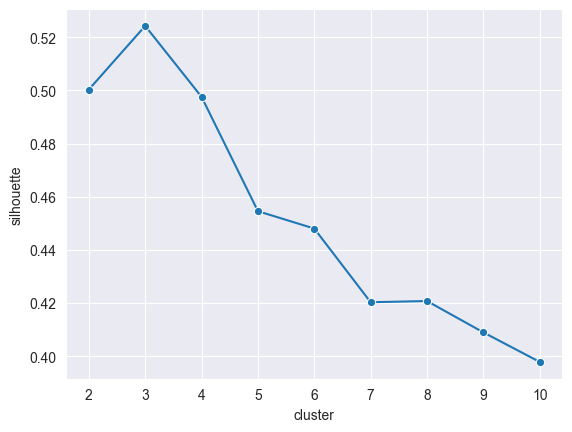

In [84]:
# описываем функцию
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, rfm_pipeline))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

mask_silh = silhouette_df['silhouette'] == silhouette_df['silhouette'].max()
display(silhouette_df[mask_silh].round(2))

<span style='color:red'>NB!!! Воспользуемся EM-алгоритмом (GaussianMixture) для подбера оптимального количества кластеров с помощью коэффициента силуэта. Сравним работу 2х алгоритмов.

#### Задание 5.5

1. Какое количество кластеров лучше всего взять?
2. Чему равно максимальное значение коэффициента силуэта? Ответ округлите до двух знаков после точки-разделителя.


,silhouette,cluster
1,0.44,3


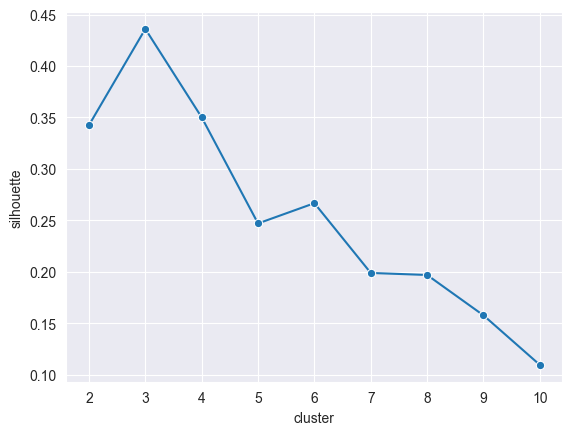

In [85]:
# описываем функцию
def get_silhouette(cluster_num, X):
    gaussian_mix =  GaussianMixture(n_components=cluster_num, random_state=42)
    gaussian_mix.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, gaussian_mix.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, rfm_pipeline))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

mask_silh = silhouette_df['silhouette'] == silhouette_df['silhouette'].max()
display(silhouette_df[mask_silh].round(2))

#### Задание 5.6

1. Для какой модели с оптимальным количеством кластеров коэффициент силуэта наибольший: K-Means или GaussianMixture?
2. Сколько клиентов попало в самый большой кластер при использовании для кластеризации лучшей модель с подобранным ранее количеством кластеров на декомпозированных данных?

In [87]:
# обучаем модель и проводим кластеризацию с использованием алгоритма Kmeans - как показавшего наилучший результат по коэффициенту силуэта
model_K_Means = KMeans(n_clusters=3, random_state=42)
model_K_Means.fit(rfm_pipeline)

label_km= model_K_Means.predict(rfm_pipeline)
rfm_kmens = rfm_pipeline.copy()
rfm_kmens['cluster'] = label_km

print(rfm_kmens['cluster'].value_counts(ascending=False))

cluster
2    2269
0     999
1     776
Name: count, dtype: int64


NB! Ответ 2267 с платформой не сходится (указано 2269). Причина, скорей всего, в версиях библиотек Numpy, Pandas, Sklearn.

**Визуализируем результаты кластеризации:**

In [88]:
# визуализируем пространство главных компонент после декомпозиции
fig = px.scatter(data_frame=rfm_kmens, x='axis-1', y='axis-2', color='cluster')

fig.update_layout(height=700, width=1200, title_text="Кластеризация с помощью алгоритма KMeans")
fig.show()

**ДОПОЛНЕНИЕ** - для оценки и сравнения обучим модель с использованием алгоритма GaussianMixture() и визуализируем результат.

In [89]:
# обучаем модель и проводим кластеризацию с использованием алгоритма GaussianMixture
model_GausMix = GaussianMixture(n_components=3, random_state=42)
model_GausMix.fit(rfm_pipeline)

label_gm = model_GausMix.predict(rfm_pipeline)
rfm_gausmix = rfm_pipeline.copy()
rfm_gausmix['cluster'] = label_gm

print(rfm_gausmix['cluster'].value_counts(ascending=False))

cluster
1    1686
2    1309
0    1049
Name: count, dtype: int64


**Визуализируем результаты кластеризации:**

In [90]:
# визуализируем пространство главных компонент после кластеризации
fig = px.scatter(data_frame=rfm_gausmix, x='axis-1', y='axis-2', color='cluster')

fig.update_layout(height=700, width=1200, title_text="Кластеризация с помощью алгоритма GaussianMixture")
fig.show()

<span style='color:red'>NB!!! Мы получили 3 сегмента клиентов. Необходимо составить профиль для этих сегментов. Для составления профиля кластеров нам необходимо сгруппировать RFM-таблицу по полученным кластерам и рассчитайть среднее по каждому из признаков.

#### Задание 5.7

Чему равно максимальное среднее значение признака Frequency в полученной таблице (ответ округлите до целого числа)?.

In [101]:
# формируем сводную таблицу в разрезе кластеров по меткам RFM
rfm_cleaned['Cluster'] = label_km
cluster_groupby = rfm_cleaned.groupby(by='Cluster').mean()
display(cluster_groupby)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,253.474474,1.403403,386.277297
1,31.943299,7.068299,2657.746997
2,51.221684,2.329220,660.068947


### Полярная диаграмма
<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png align="right" width="300"/> </center>

Одним из способов визуализации профиля кластеров является диаграмма — **Radar Chart (полярная, или лепестковая, диаграмма)**. Это графическое представление значений нескольких эквивалентных категорий в форме «паутины».

**Radar Chart** очень часто используется в контексте определения профиля кластеров. На концах «паутины» откладываются оси, которые соответствуют признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

На данной диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие к данному кластеру, в большей степени увлекаются музыкой (Music), а в меньшей степени — программированием (Programm).

В модуле ***graph_objects** библиотеки **plotly** есть встроенная функция [Scatterpolar](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatterpolar.html), которая позволяет построить полярную диаграмму. На основе этой функции мы реализуем собственную функцию **plot_cluster_profile()**, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У этой функции два параметра: grouped_data — сгруппированные по кластерам характеристики объектов (клиентов), n_clusters — количество кластеров. 

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией также добавлен в реализацию функции **plot_cluster_profile()**.

In [102]:
# описываем функцию
def plot_cluster_profile(grouped_data, n_clusters):
    """
    Функция, которая визуализирует профиль кластеров в виде полярной диаграммы plotly.graph_objects.Scatterpolar
    
    Args:
        grouped_data (pd.Dataframe()): сгруппированные по кластерам характеристики объектов / клиентам;
        n_clusters (int): количество кластеров в данных 
        
    Returns:
        figure (plotly.graph_objects.Scatterpolar): график в виде полярной диаграммы.
    """
    # нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # создаем список признаков
    features = grouped_data.columns
    # создаем пустую фигуру
    fig = go.Figure()
    # в цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # создаем полярную диаграмму и добавляем ее на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название - номер кластера
        ))
    # обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=1000, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # отображаем фигуру
    fig.show()
    

<span style='color:red'>NB!!! Визуализируем профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик, вычисленных для каждого кластера и проанализируем кластеры и на основе анализа, сопоставив номера кластера и его описание.

#### Задание 5.8

На основании построенной диаграммы ответьте на вопросы:
1. Какой кластер соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая?
2. Какой кластер соответствует «промежуточным» клиентам, которые являются активными, но покупают не так часто и много, как лояльные клиенты. В то же время эти клиенты не являются «потерянными»?
3. Какой кластер соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена очень давно?


In [103]:
# выводим график визуализации профиля сформированных кластеров
plot_cluster_profile(cluster_groupby, 3)

<span style='color:blue'>**Комментарии:**

1. Кластер №1 соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая;
2. Кластер №2 соответствует «промежуточным» клиентам, которые являются активными, но покупают не так часто и много, как лояльные клиенты. В то же время эти клиенты не являются «потерянными»;
3. Кластер №0 соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена очень давно.

### **5.2. RFM-сегментация клиентов: часть-2**

<span style='color:red'>NB!!! С помощью PCA (линейного метода) нам удалось выделить три сегмента клиентов. Однако в маркетинге принято оперировать большим их количеством: обычно стараются создать стратегию хотя бы для пяти-семи клиентских сегментов в градации от «лояльных» до «потерянных» с промежуточными категориями. Для решения поставленной задачи попробуем использовать нелинейную трансформацию или алгоритм снижения размерности t-SNE.

Воспользуемся алгоритмом **t-SNE** и трансформируем RFM-таблицу, очищенную от выбросов, в двухмерное представление. Также предусмотрим масштабирование признаков.

Создадим pipeline, который будет содержать следующие шаги:
* стандартизация с помощью StandardScaler с параметрами по умолчанию; 
* алгоритм t-SNE с двумя компонентами, параметрами perplexity=50 и random_state=100.

Обучим pipeline на RFM-таблице (очищенной от выбросов), полученной ранее, и примените к ней трансформацию.

#### Задание 6.1

Чему равно значение дивергенции Кульбака — Лейблера для обученного алгоритма t-SNE? Ответ округлите до двух знаков после точки-разделителя?

**Примечание:**
Дивергенция Кульбака-Лейблера - это функция потерь, которая минимизируется при обучения алгоритма t-SNE. Она показывает меру расстояния между двумя распределениями. Оптимальное значение данной характеристики, найденное в процессе обучения алгоритма t-SNE, хранится в атрибуте kl_divergence_ объекта класса TSNE из библиотеки sklearn. 

In [104]:
# формируем pipleline
rfm_cleaned = rfm_cleaned.drop(columns='Cluster', axis=1) # удаляем ранее созданный признак с номерами кластеров
pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, perplexity=50, random_state=100))
])
rfm_pipeline_2 = pipeline_2.fit_transform(rfm_cleaned)
rfm_pipeline_2 = pd.DataFrame(rfm_pipeline_2, columns=['axis-1', 'axis-2'], index=rfm_cleaned.index)

print(round(pipeline_2['tsne'].kl_divergence_, 2))
#print(pipeline_2.get_params()) # выведем параметры papeline для информации и оценки

0.54


In [105]:
# визуализируем пространство главных компонент после декомпозиции с помощью t-SNE
fig = px.scatter(data_frame=rfm_pipeline_2, x='axis-1', y='axis-2')

fig.update_layout(height=700, width=1200, title_text="Пространство главных компонент после декомпозиции (t-SNE)")
fig.show()

<span style='color:blue'>**Комментарий:**

1. Алгоритм t-SNE сгруппировал наиболее похожие объекты в подобие кластеров, причём эти кластеры можно визуально определить.

<span style='color:red'>NB!!! Воспользуемся алгоритмами кластеризации KMeans, GaussianMixture, AgglomerativeClustering и с помощью коэффициента силуэта (перебирая возможные значения кластеров) определим оптимальное количество кластеров, чтобы сформировать новые сегменты клиентов.

#### Задание 6.2

1. По результатам алгоритма **KMeans** и полученных результатов коэффициента силуэта, какое количество кластеров лучше всего взять?
2. Чему равно максимальное значение коэффициента силуэта (ответ округлите до двух знаков после точки-разделителя)?

,silhouette,cluster
5,0.484,7


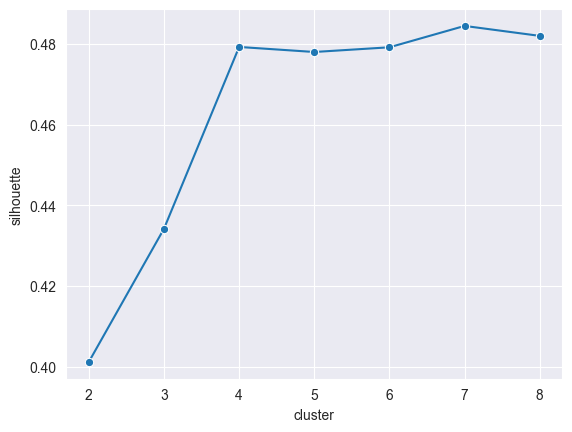

In [123]:
# описываем функцию расчета коэффициента используя алгоритм KMeans
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 9):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, rfm_pipeline_2))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

mask_silh = silhouette_df['silhouette'] == silhouette_df['silhouette'].max()
display(silhouette_df[mask_silh].round(3))

#### Задание 6.3

1. По результатам алгоритма **GaussianMixture** и полученных результатов коэффициента силуэта, какое количество кластеров лучше всего взять?
2. Чему равно максимальное значение коэффициента силуэта (ответ округлите до двух знаков после точки-разделителя)?

,silhouette,cluster
2,0.469,4


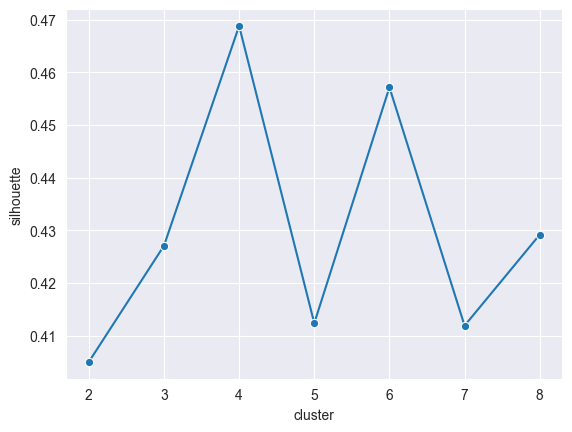

In [122]:
# описываем функцию
def get_silhouette(cluster_num, X):
    gaussian_mix =  GaussianMixture(n_components=cluster_num, random_state=42)
    gaussian_mix.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, gaussian_mix.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 9):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, rfm_pipeline_2))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

mask_silh = silhouette_df['silhouette'] == silhouette_df['silhouette'].max()
display(silhouette_df[mask_silh].round(3))

#### Задание 6.4

1. По результатам алгоритма **AgglomerativeClustering** и полученных результатов коэффициента силуэта, какое количество кластеров лучше всего взять?
2. Чему равно максимальное значение коэффициента силуэта (ответ округлите до двух знаков после точки-разделителя)?



,silhouette,cluster
6,0.479,8


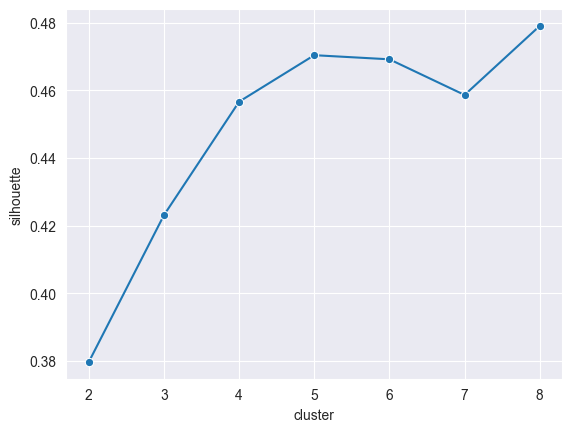

In [121]:
# описываем функцию
def get_silhouette(cluster_num, X):
    aglomerativ =  AgglomerativeClustering(n_clusters=cluster_num)
    aglomerativ.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, aglomerativ.labels_)
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# запустим цикл перебора количесвтва кластеров 
for cluster_num in range(2, 9):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, rfm_pipeline_2))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

mask_silh = silhouette_df['silhouette'] == silhouette_df['silhouette'].max()
display(silhouette_df[mask_silh].round(3))

#### Задание 6.5

1. Какая модель показала лучшие результаты с оптимальным количеством кластеров коэффициент силуэта наибольший?
2. После обучения лучшей модели, с подобранным ранее количеством кластеров на декомпозированных данных, сколько клиентов попало в самый большой кластер?

<span style='color:blue'>**Комментарий:**

1. Наилучший результат показала модель **KMeans** c разделением на 7 кластеров и коэффициентом силуэта = 0.484;
2. На втором месте модель **AgglomerativeClustering** c разделением на 8 кластеров и коэффициентом силуэта = 0,479.

In [126]:
# обучаем модель и проводим кластеризацию с использованием алгоритма Kmeans - как показавшего наилучший результат по коэффициенту силуэта
model_K_Means_7 = KMeans(n_clusters=7, random_state=42)
model_K_Means_7.fit(rfm_pipeline_2)

label_km_7= model_K_Means_7.predict(rfm_pipeline_2)
rfm_kmens_7 = rfm_pipeline_2.copy()
rfm_kmens_7['Cluster'] = label_km_7

print(rfm_kmens_7['Cluster'].value_counts(ascending=False))

Cluster
1    914
4    683
0    656
2    543
5    446
6    405
3    397
Name: count, dtype: int64


Визуализируем результаты кластеризации:

In [128]:
# визуализируем пространство главных компонент после декомпозиции с помощью t-SNE
fig = px.scatter(data_frame=rfm_kmens_7, x='axis-1', y='axis-2', color='Cluster')

fig.update_layout(height=700, width=1200, title_text="Кластеризация с помощью Kmeans на 7 кластеров.")
fig.show()

In [135]:
# создаем признак с кластерами в dataset
rfm_cleaned['Cluster'] = label_km_7
# построим визуализацию нашего трёхмерного пространства признаков:
fig = px.scatter_3d(
    data_frame=rfm_cleaned, #DataFrame
    x = 'Recency', #ось абсцисс
    y = 'Frequency', #ось ординат
    z = 'MonetaryValue', #ось аппликат
    color='Cluster', #расцветка в зависимости от страны
    #log_x=True, 
    #log_y=True,
    width=1200,
    height=900
)
fig.update_traces(marker_size=2)
#отображаем график
fig.show()

**ДОПОЛНЕНИЕ** - для сравнения проведем кластеризацию и визуализацию с применением алгоритма **AgglomerativeClustering** (8 кластеров).

In [136]:
# обучаем модель и проводим кластеризацию с использованием алгоритма Kmeans - как показавшего наилучший результат по коэффициенту силуэта
model_agg_clust_8 = AgglomerativeClustering(n_clusters=8)
model_agg_clust_8.fit(rfm_pipeline_2)

label_agg_clust_8 = model_agg_clust_8.labels_
rfm_agg_clust_8 = rfm_pipeline_2.copy()
rfm_agg_clust_8['Cluster'] = label_agg_clust_8

#print(rfm_agg_clust_8['Cluster'].value_counts(ascending=False))

In [133]:
# визуализируем пространство главных компонент после декомпозиции с помощью t-SNE
fig = px.scatter(data_frame=rfm_agg_clust_8, x='axis-1', y='axis-2', color='Cluster')

fig.update_layout(height=700, width=1200, title_text="Кластеризация с помощью AgglomerativeClustering на 8 кластеров.")
fig.show()

<span style='color:blue'>**Комментарий:**

1. Модель **AgglomerativeClustering** выделила дополнительный 1 кластер (выделен желтым), по логике он является обособленным или выбросом. Так же границы разделения на кластеры стали четче.


<span style='color:red'>NB!!! Итак, у нас есть 7 сегментов клиентов. Cоставим профиль для этих сегментов. Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к RFM-таблице (очищенной от выбросов). Сгруппируем RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

#### Задание 6.6

1. Чему равно максимальное среднее значение признака Recency в полученной таблице (ответ округлите до целого числа)?

In [137]:
# формируем сводную таблицу в разрезе кластеров по меткам RFM
cluster_groupby_7 = rfm_cleaned.groupby(by='Cluster').mean()
display(cluster_groupby_7)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,46.329268,1.000000,321.538796
1,32.400438,6.770241,2416.582451
2,40.022099,1.979742,613.663941
3,313.000000,1.012594,261.105315
4,40.149341,3.450952,995.197350
5,195.800448,2.441704,670.317960
6,181.439506,1.000000,273.465160


In [138]:
# выводим график визуализации профиля сформированных 7 кластеров
plot_cluster_profile(cluster_groupby_7, 7)

#### Задание 6.7

Проанализируйте кластеры и на основе анализа сопоставьте номер кластера и его описание:

* Какой кластер соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая?
* Какой кластер соответствует «перспективным» клиентам, которые являются активными покупателями, но покупают не так часто и не так много, как лояльные клиенты?
* Какой кластер соответствует «подвисшим» клиентам, которые относительно недавно сделали несколько заказов на небольшие суммы. Потенциально эти клиенты могут быть переведены в кластер «перспективных»?
* Какой кластер соответствует клиентам «в зоне риска», которые несколько раз покупали товары на небольшие суммы, однако их последняя покупка была совершена более пяти месяцев назад?
* Какой кластер соответствует клиентам-«новичкам», которые относительно недавно сделали один заказ на небольшую сумму? 
* Какой кластер соответствует «спящим» или «почти потерянным» клиентам, которые сделали один заказ на маленькую сумму более семи месяцев назад и больше не возвращались?
* Какой кластер соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена около года назад.



<span style='color:blue'>**Комментарий:**

1. Кластер №1 соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая;
2. Кластер №4 соответствует «перспективным» клиентам, которые являются активными покупателями, но покупают не так часто и не так много, как лояльные клиенты;
3. Кластер №2 соответствует «подвисшим» клиентам, которые относительно недавно сделали несколько заказов на небольшие суммы. Потенциально эти клиенты могут быть переведены в кластер «перспективных»;
4. Кластер №5 соответствует клиентам «в зоне риска», которые несколько раз покупали товары на небольшие суммы, однако их последняя покупка была совершена более пяти месяцев назад;
5. Кластер №0 соответствует клиентам-«новичкам», которые относительно недавно сделали один заказ на небольшую сумму;
6. Кластер №6 соответствует «спящим» или «почти потерянным» клиентам, которые сделали один заказ на маленькую сумму более пяти месяцев назад и больше не возвращались;
7. Кластер №3 соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена около года назад. 

### **5.3 RFM-кластеризация клиентов: часть-3**

В части 1 и 2 мы построили модель кластеризации для клиентов. Следующая наша задача это предсказание сегмента для клиентов, которые не попали в обучающую выборку.


Мы обучали наши алгоритмы кластеризации на сжатом с помощью t-SNE пространстве признаков. То есть, чтобы сделать предсказание для новых объектов, не попавших в выборку, нам необходимо будет совершить трансформацию признаков этих объектов в новое сжатое пространство. Однако проблема t-SNE заключается в том, что алгоритм непараметрический. Это значит, что он, в отличие от таких алгоритмов, как PCA и SVD, не создаёт явной функции отображения или, что значит, алгоритм трансформирует пространство признаков для обучающей выборки, но не запоминает, каким образом это делает. Передав в алгоритм новые объекты для сжатия пространства, мы получим абсолютно новое представление пространства, не имеющее отношения к тому, что мы построили для обучающей выборки. То есть произойдёт искажение, что может привести к неверным результатам кластеризации.

Именно поэтому у алгоритма TSNE из библиотеки sklearn нет такого метода, как transform(), у него есть только метод fit_transform() — заново обучить алгоритм t-SNE и произвести трансформацию.

В связи с этим нам необходимо свести задачу кластеризации к задаче классификации. У нас теперь есть истинные метки кластеров, а есть клиенты, которые описываются RFM-характеристиками, тогда обучим модель, которая на основе RFM-характеристик будет предсказывать клиентский сегмент. 

### Задание 7.1

1. Сколько клиентов попали в тестовую выборку?

In [142]:
# создадим копию dataframe
data_rfm = rfm_cleaned.copy()
display(data_rfm.head(3))

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,325,1,0.00,3
12347,2,7,4310.00,1
12348,75,4,1437.24,4


In [144]:
# создадим матрицу наблюдений и целевой признак 
X = data_rfm.drop(columns='Cluster', axis=1)
y = data_rfm['Cluster']
# разделим исходные данные на тренировочную и тестовую выборки в соотношении 80/20 (random_state = 42).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Размер тестовыой выборки = {X_test.shape}.')

Размер тестовыой выборки = (809, 3).


<span style='color:red'>NB!!! Построим несколько моделей класификации и выберем из них лучшую. Так ка алгоритм t-SNE является нелинейным методом понижения размерности, то линейные модели (такие как логистическая регрессия) в данной задаче не применимы. В качестве моделей будем использовать **RandomForestClassifier** и **GradientBoostingClassifier**. 

<span style='color:red'>С помощью алгоритма GridSearchCV подберем гиперпараметры и оценим целевую метрику **accyracy**. В качестве базовой модели будем использовать алгоритм, который покажет лучший результат. 


#### Задание 7.2

1. Обучите GridSearchCV на тренировочной выборке. Чему равна оптимальная максимальная глубина деревьев в случайном лесу?
2. С помощью лучшей модели сделайте предсказание для тестовой выборки и рассчитайте метрику accuracy. Ответ округлите до трёх знаков после точки-разделителя.

In [147]:
# формируем сетку гиперпараметров
param_grid ={'max_depth': range(5, 15), # максимальная глубина деревьев
             'criterion': ['gini', 'entropy'], # критерий оценки вероятности
             'n_estimators': [100, 200, 300, 400, 500] # количество деревьев в лесу
            }
# cоздаем объект класса GridSearchCV                 
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid, 
    cv=5,
    scoring=('accuracy'), 
    n_jobs = -1
) 
# обучаем модель  
%time grid_search_rf.fit(X_train, y_train) 
# формируем предсказания целевой переменной
y_train_pred_rf = grid_search_rf.predict(X_train)
y_test_pred_rf = grid_search_rf.predict(X_test)
print('Accuracy на тренировочном наборе: {:.3f}'.format(accuracy_score(y_train, y_train_pred_rf)))
print('Accuracy на тестовом наборе: {:.3f}'.format(accuracy_score(y_test, y_test_pred_rf)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_rf.best_params_))

CPU times: user 2.67 s, sys: 169 ms, total: 2.84 s
Wall time: 48.4 s
Accuracy на тренировочном наборе: 1.000
Accuracy на тестовом наборе: 0.985
Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 13, 'n_estimators': 200}


#### Задание 7.3

1. Обучите GridSearchCV на тренировочной выборке. Чему равна оптимальная максимальная глубина деревьев в градиентном бустинге?
2. С помощью лучшей модели сделайте предсказание для тестовой выборки и рассчитайте метрику accuracy. Ответ округлите до трёх знаков после точки-разделителя.



In [149]:
# формируем сетку гиперпараметров
param_grid ={'max_depth': range(3, 7), # максимальная глубина деревьев
             'learning_rate': [0.001, 0.01, 0.1], #
             'n_estimators': [100, 200, 300, 400, 500] # количество деревьев в лесу
            }
# cоздаем объект класса GridSearchCV                 
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid, 
    cv=5,
    scoring=('accuracy'), 
    n_jobs = -1
) 
# обучаем модель  
%time grid_search_gb.fit(X_train, y_train) 
# формируем предсказания целевой переменной
y_train_pred_gb = grid_search_gb.predict(X_train)
y_test_pred_gb = grid_search_gb.predict(X_test)
print('Accuracy на тренировочном наборе: {:.3f}'.format(accuracy_score(y_train, y_train_pred_gb)))
print('Accuracy на тестовом наборе: {:.3f}'.format(accuracy_score(y_test, y_test_pred_gb)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_gb.best_params_))

CPU times: user 6.69 s, sys: 494 ms, total: 7.18 s
Wall time: 4min 23s
Accuracy на тренировочном наборе: 1.000
Accuracy на тестовом наборе: 0.983
Наилучшие значения гиперпараметров: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [156]:
# на основании подобранных гиперпараметров обучем модель
model_best = RandomForestClassifier(**grid_search_rf.best_params_, random_state=RANDOM_SEED, )
model_best.fit(X_train, y_train)

# делаем предсказание для тренировочной выборки
y_train_pred_best = model_best.predict(X_train)
# вывод отчет о метриках классификации
print('train_dataset')
print(classification_report(y_train, y_train_pred_best))
# делаем предсказание для тестовой выборки
y_test_pred_best = model_best.predict(X_test)
# вывод отчет о метриках классификации
print('test_dataset')
print(classification_report(y_test, y_test_pred_best))

train_dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       516
           1       1.00      1.00      1.00       731
           2       1.00      1.00      1.00       434
           3       1.00      1.00      1.00       326
           4       1.00      1.00      1.00       550
           5       1.00      1.00      1.00       352
           6       1.00      1.00      1.00       326

    accuracy                           1.00      3235
   macro avg       1.00      1.00      1.00      3235
weighted avg       1.00      1.00      1.00      3235

test_dataset
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       140
           1       0.98      0.99      0.99       183
           2       1.00      0.97      0.99       109
           3       0.99      0.97      0.98        71
           4       0.98      0.97      0.97       133
           5       0.95      0.98      0.96        

### ⭐ Отлично, мы справились с проблемой непараметричности t-SNE и смогли перейти от решения задачи кластеризации к задаче классификации. Теперь у нас есть модель, которая на основе RFM-характерик клиента автоматически определяет его сегмент.